<a href="https://colab.research.google.com/github/Judy-Youssef/Titanic-EDA/blob/main/Titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Set up**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=eb87c6324225dfc0027b85cb9f00598057dca22fd4eb0f3ef3cbb5d2dc8d67b7
  Stored in directory: /root/.cache/pip/wheels/5f/d4/d7/4189b07b5902ee9f3ce0dbb14909fbe8037c39d6c63ffd49c9
Successfully built htmlmin
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      

In [4]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt

import seaborn as sns
from pandas_profiling import ProfileReport

/tmp/ipython-input-4155419160.py:12: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


# **Exploration**

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Internship Work/Elevvo/Titanic/Titanic.csv")
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   int64  
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Embarked     1309 non-null   object 
dtypes: float64(1), int64(6), object(4)
memory usage: 112.6+ KB


In [7]:
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)

Shape: (1309, 11)

Data Types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age              int64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object


In [8]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64


In [9]:
df['Fare'].fillna(df.groupby('Pclass')['Fare'].transform('median'), inplace=True)
print(df['Fare'].isnull().sum())

0


/tmp/ipython-input-1354083326.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fare'].fillna(df.groupby('Pclass')['Fare'].transform('median'), inplace=True)


In [10]:
report = ProfileReport(df)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 11/11 [00:00<00:00, 34.84it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# **Data Visualization**

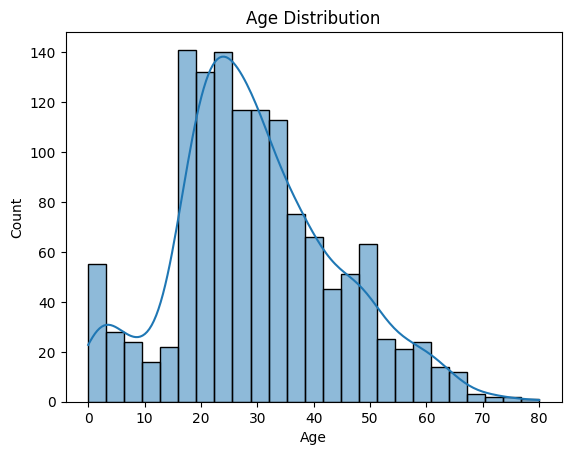

In [11]:
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()

Shows most passengers were between 20–40 years old, with fewer children and elderly.

Slight right skew, meaning a few much older passengers pull the average up.

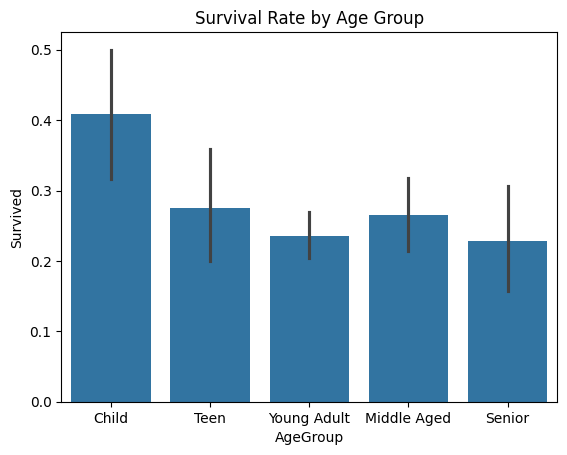

In [ ]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0,12,18,35,50,80], labels=['Child','Teen','Young Adult','Middle Aged','Senior'])
sns.barplot(x='AgeGroup', y='Survived', data=df)
plt.title("Survival Rate by Age Group")
plt.show()

Children had noticeably higher survival rates than teens and adults.

Young adults and middle-aged passengers had lower survival chances, possibly due to prioritization of women/children.

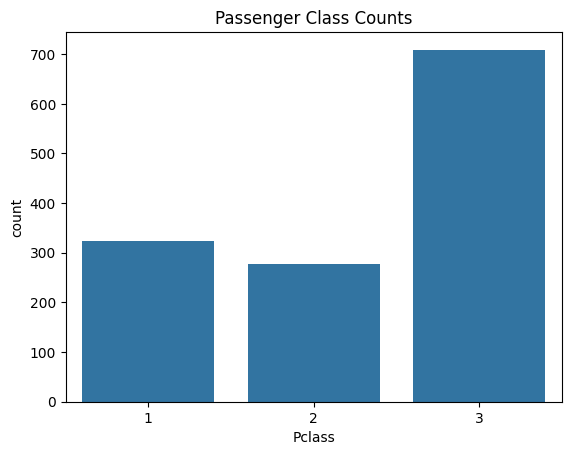

In [ ]:
sns.countplot(x='Pclass', data=df)
plt.title("Passenger Class Counts")
plt.show()

The largest group was 3rd class passengers, followed by 1st and then 2nd.

Indicates Titanic had a heavier lower-class population on board.

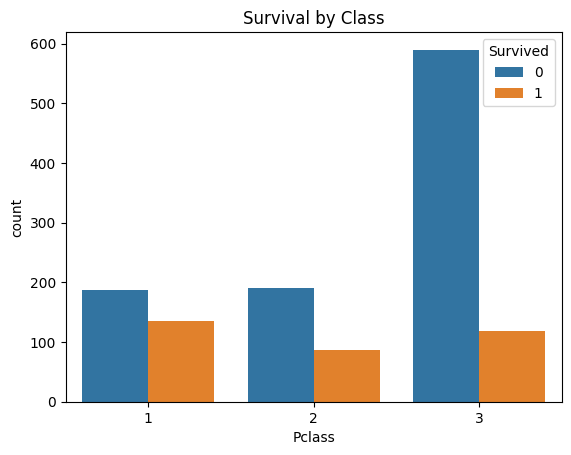

In [ ]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Class")
plt.show()

1st class had the highest survival rate, 3rd class the lowest.

Highlights socio-economic disparities in rescue

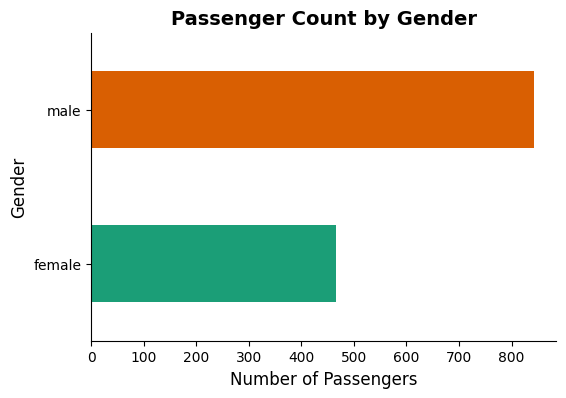

In [ ]:
gender_counts = df.groupby('Sex').size()

plt.figure(figsize=(6,4))
bars = gender_counts.plot(
    kind='barh',
    color=sns.color_palette("Dark2")[0:len(gender_counts)]
)
plt.title("Passenger Count by Gender", fontsize=14, fontweight='bold')
plt.xlabel("Number of Passengers", fontsize=12)
plt.ylabel("Gender", fontsize=12)
plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()

Males significantly outnumbered females on board.

This imbalance likely impacted survival rates when prioritizing women and children.

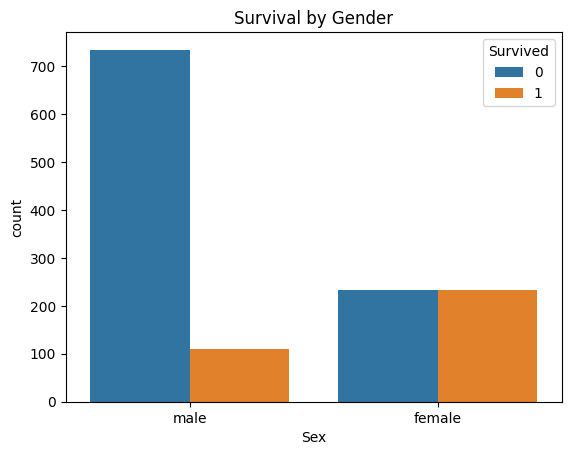

In [ ]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.show()

Females had a much higher survival rate than males.

Strong evidence of the “women and children first” evacuation policy.

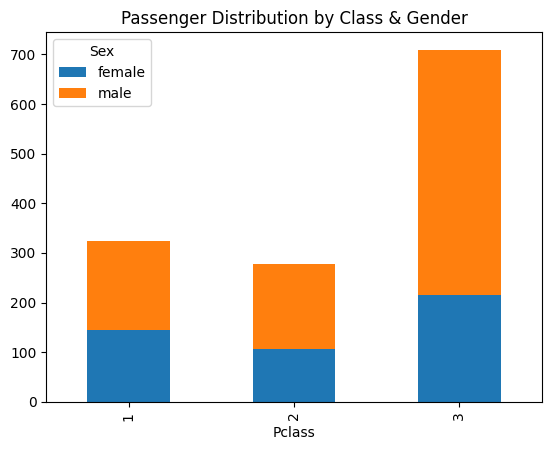

In [ ]:
pd.crosstab(df['Pclass'], df['Sex']).plot(kind='bar', stacked=True)
plt.title("Passenger Distribution by Class & Gender")
plt.show()

3rd class had more men than women, 1st class had a more balanced mix.

Suggests class and gender were interlinked in survival chances.

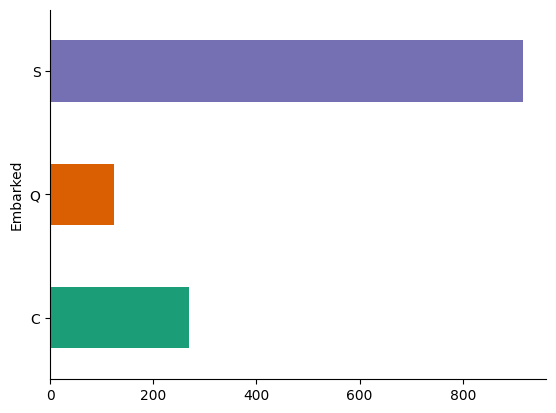

In [ ]:
df.groupby('Embarked').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Most passengers boarded from Southampton (S), then Cherbourg (C), then Queenstown (Q).

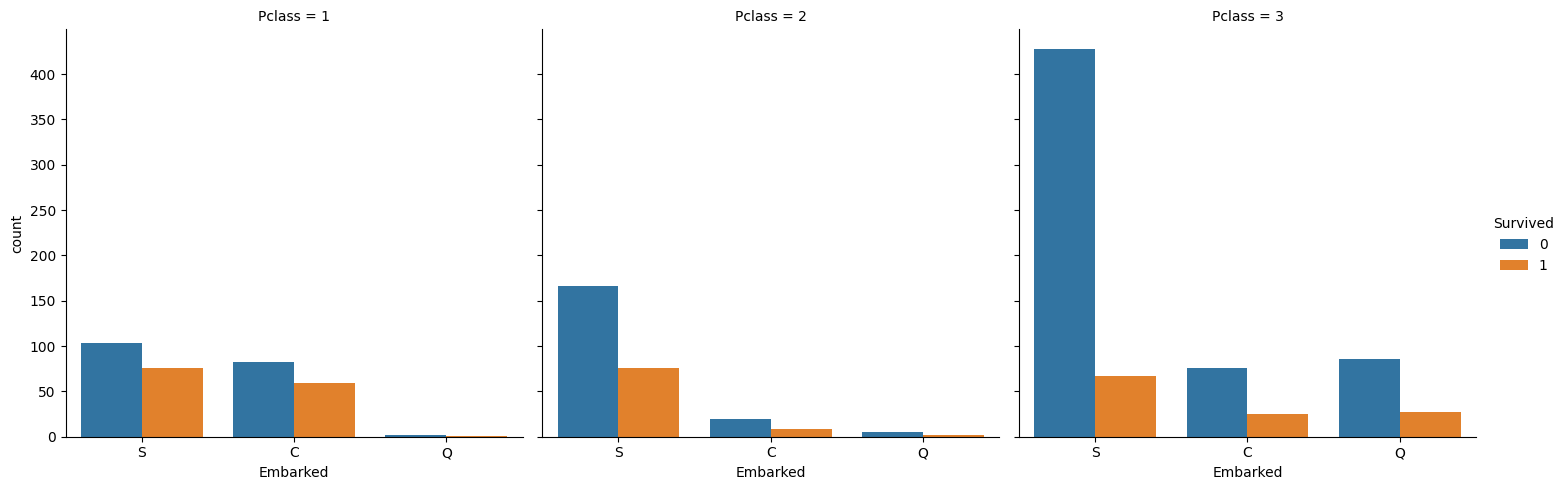

In [ ]:
sns.catplot(x='Embarked', hue='Survived', col='Pclass', data=df, kind='count')

Survival varied by both port and class — e.g., Cherbourg passengers had higher survival rates, possibly because many were in 1st class.

Southampton had many 3rd class passengers with lower survival.

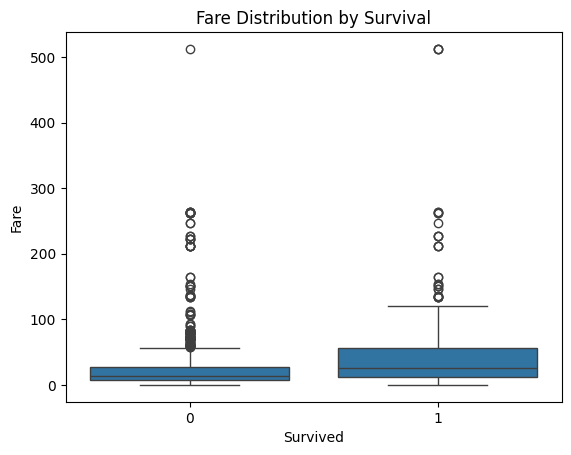

In [ ]:
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare Distribution by Survival")
plt.show()

Survivors generally paid higher fares, with some extreme high-paying outliers.

Indicates wealth was correlated with better survival odds.

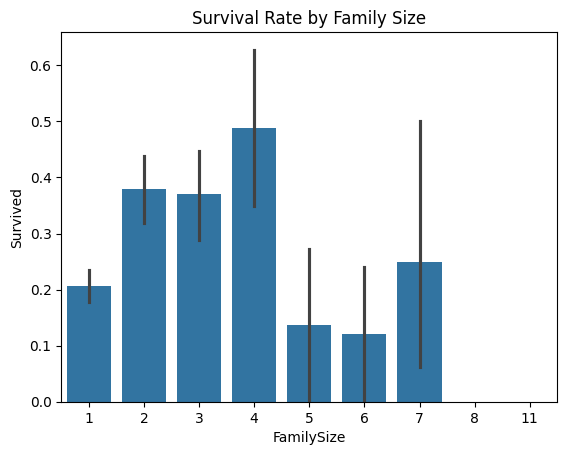

In [ ]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title("Survival Rate by Family Size")
plt.show()

Small families (2–4 members) had higher survival chances.

Very large families and solo travelers had lower survival rates — possibly due to rescue logistics or separation during evacuation.

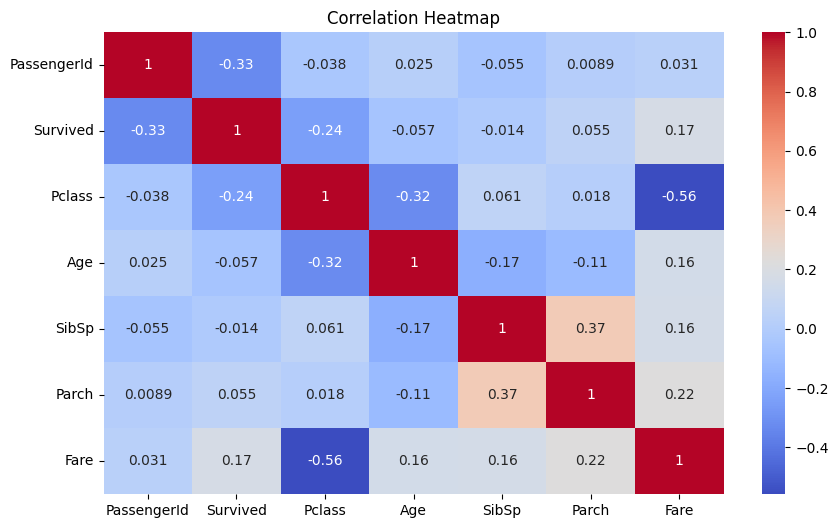

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Fare positively correlates with survival (higher fare → higher chance).

Passenger class negatively correlates with survival (lower class number → higher survival).

SibSp and Parch are moderately correlated with each other (family travel patterns).

# ***Conclusions***

The exploratory analysis of the Titanic dataset reveals clear demographic, socio-economic, and situational patterns in passenger distribution and survival outcomes.


*   First-class passengers, women, children, and those paying higher fares had significantly better survival chances.
*   Third-class passengers — especially men — faced the lowest odds, reflecting both cabin location and evacuation priorities.
*   Small family groups survived more often than solo travelers or large families, likely due to evacuation logistics.
*   Port of embarkation also influenced outcomes, with Cherbourg passengers showing higher survival rates due to a greater proportion of first-class travelers.

Overall, wealth, gender, age, and family size collectively determined who had the best chance of survival in the disaster.